Nowadays, the number of heart diseases is increasing regardless of gender or age. According to WHO, heart disease is the largest cause of death in the world. Of these, ischemic heart disease accounts for 16% and stroke accounts for 11% of deaths globally. Since 2000, deaths from the disease have increased the most, increasing by more than 2 million to 8.9 million deaths in 2019.

Common heart diseases include blood vessel diseases such as coronary artery disease, arrhythmias and congenital heart defects, along with many other diseases.

Therefore, early prediction of cardiovascular disease is considered one of the important issues in clinical data analysis. But it is difficult to accurately determine and predict early symptoms of heart disease because there are many factors such as diabetes, high blood pressure, high cholesterol, abnormal heart rhythm and many other factors. The amount of data in the healthcare industry is huge. Therefore, data mining and extracting information from this large data set is necessary to support early diagnosis and prevention of possible cardiovascular complications.

In this project, I will apply basic machine learning methods (Naive bayes, K-nearest neigbors (KNN), Decision tree, Random forest, Adaboost, Gradient boost, XGBoost and Support vector machine (SVM)) to predict whether a person is likely to have heart disease based on the `Cleveland Heart Disease` dataset from the `UCI Machine Learning Repository`. The dataset contains 14 information columns which are Age, Sex, Chest-pain type, Resting Blood Pressure, Serum Cholestrol, Fasting Blood Sugar, Resting ECG, Max heart rate achieved, ST depression induced by exercise relative to res, Peak exercise ST segment, Number of major vessels (0–3) colored by flourosopy, Displays the thalassemia, Diagnosis of heart disease (0 represents patients without the disease, and 1,2,3,4 represent patients with the disease). 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

## 1. Read and Preprocessing data

In [2]:
df = pd.read_csv(r"D:\dataset\cleveland.csv",
                 names=['age','sex','cp','trestbps','chol',
                        'fbs','restecg','thalach','exang',
                        'oldpeak','slope','ca','thal','target'])
df['target'] = df['target'].map({0:0, 1:1, 2:1, 3:1, 4:1})

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


`ca` and `thal` columns contain only an insignificant number of missing values which will be replaced by the mean of their columns.

In [5]:
df['ca'].fillna(df['ca'].mean(), inplace=True)
df['thal'].fillna(df['thal'].mean(), inplace=True)

## 2. Exploring data

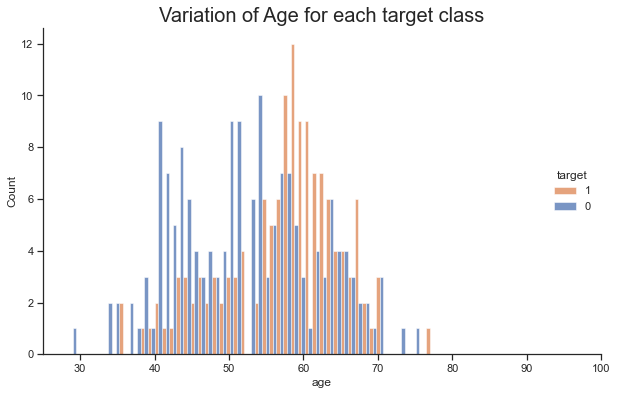

In [6]:
# Examine the distribution of target vs age
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', hue='target', multiple='dodge', bins=50)
plt.xlim(25, 100)
plt.legend(['1','0'], title='target', loc='center right', frameon=False)
plt.title('Variation of Age for each target class', fontdict={'size':20})
plt.show()

The heart disease like has a relationship with the age. Particularly, from the age of over 55, the proportion of people has heart disease and people do not have heart disease, in comparion to the age of under 55.

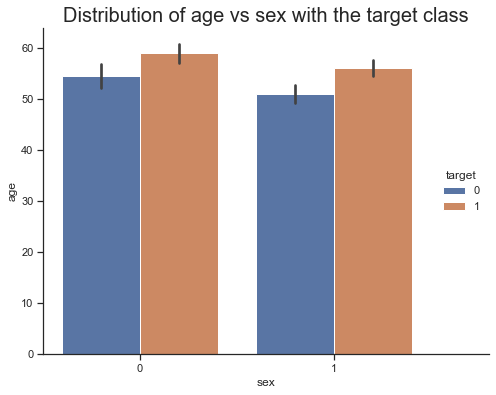

In [7]:
font = {'size': 20}
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='sex', y='age', hue='target')
plt.xlim(-0.5, 1.8)
plt.legend(loc='center right', title='target', frameon=False)
plt.title('Distribution of age vs sex with the target class', fontdict=font)
plt.show()

## 3. Modelling

In [8]:
X = df.drop(['target'], axis=1).to_numpy()
y = df['target'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.1. KNN Algorithm

In [25]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

knn_test_pred = knn_classifier.predict(X_test)
knn_train_pred = knn_classifier.predict(X_train)

knn_test_score = accuracy_score(y_test, knn_test_pred)
print(f'Accuracy for training set for KNeighborsClassifier = {accuracy_score(y_train, knn_train_pred)}')
print(f'Accuracy for testing set for KNeighborsClassifier = {accuracy_score(y_test, knn_test_pred)}')

Accuracy for training set for KNeighborsClassifier = 0.7603305785123967
Accuracy for testing set for KNeighborsClassifier = 0.6885245901639344


### 3.2. Support Vector Classifier

In [26]:
svc_classifier = SVC(random_state=42)
svc_classifier.fit(X_train, y_train)

svc_train_pred = svc_classifier.predict(X_train)
svc_test_pred = svc_classifier.predict(X_test)

svc_test_score = accuracy_score(y_test, svc_test_pred)
print(f'Accuracy for training set for SVC = {accuracy_score(y_train, svc_train_pred)}')
print(f'Accuracy for testing set for SVC = {accuracy_score(y_test, svc_test_pred)}')

Accuracy for training set for SVC = 0.6611570247933884
Accuracy for testing set for SVC = 0.6721311475409836


### 3.3. Naive Bayes

In [27]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

NB_train_pred = NB_classifier.predict(X_train)
NB_test_pred = NB_classifier.predict(X_test)

NB_test_score = accuracy_score(y_test, NB_test_pred)
print(f'Accuracy for training set for Naive Bayes = {accuracy_score(y_train, NB_train_pred)}')
print(f'Accuracy for testing set for Naive Bayes = {accuracy_score(y_test, NB_test_pred)}')

Accuracy for training set for Naive Bayes = 0.8471074380165289
Accuracy for testing set for Naive Bayes = 0.8360655737704918


### 3.4. Decision Tree

In [28]:
DT_classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=2)
DT_classifier.fit(X_train, y_train)

DT_train_pred = DT_classifier.predict(X_train)
DT_test_pred = DT_classifier.predict(X_test)

DT_test_score = accuracy_score(y_test, DT_test_pred)
print(f'Accuracy for training set for Decision Tree = {accuracy_score(y_train, DT_train_pred)}')
print(f'Accuracy for testing set for Decision Tree = {accuracy_score(y_test, DT_test_pred)}')

Accuracy for training set for Decision Tree = 1.0
Accuracy for testing set for Decision Tree = 0.7213114754098361


### 3.5. Random Forest

In [29]:
RF_classifier = RandomForestClassifier(n_estimators=10,
                                       max_depth=10,
                                       min_samples_split=2,
                                       random_state=42)
RF_classifier.fit(X_train, y_train)

RF_train_pred = RF_classifier.predict(X_train)
RF_test_pred = RF_classifier.predict(X_test)

RF_test_score = accuracy_score(y_test, RF_test_pred)
print(f'Accuracy for training set for Random Forest = {accuracy_score(y_train, RF_train_pred)}')
print(f'Accuracy for testing set for Random Forest = {accuracy_score(y_test, RF_test_pred)}')

Accuracy for training set for Random Forest = 0.9834710743801653
Accuracy for testing set for Random Forest = 0.8032786885245902


### 3.6. AdaBoost

In [30]:
ada_classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
ada_classifier.fit(X_train, y_train)

ada_train_pred = ada_classifier.predict(X_train)
ada_test_pred = ada_classifier.predict(X_test)

ada_test_score = accuracy_score(y_test, ada_test_pred)
print(f'Accuracy for training set for AdaBoost = {accuracy_score(y_train, ada_train_pred)}')
print(f'Accuracy for testing set for AdaBoost = {accuracy_score(y_test, ada_test_pred)}')

Accuracy for training set for AdaBoost = 0.9132231404958677
Accuracy for testing set for AdaBoost = 0.8360655737704918


### 3.7. Gradient Boost

In [31]:
gbm_classifier = GradientBoostingClassifier(learning_rate=1.0,
                                            n_estimators=100,
                                            subsample=1.0,
                                            min_samples_split=2,
                                            max_depth=3,
                                            random_state=42)

gbm_classifier.fit(X_train, y_train)

gbm_train_pred = gbm_classifier.predict(X_train)
gbm_test_pred = gbm_classifier.predict(X_test)

gbm_test_score = accuracy_score(y_test, gbm_test_pred)
print(f'Accuracy for training set for Gradient Boost = {accuracy_score(y_train, gbm_train_pred)}')
print(f'Accuracy for testing set for Gradient Boost = {accuracy_score(y_test, gbm_test_pred)}')

Accuracy for training set for Gradient Boost = 1.0
Accuracy for testing set for Gradient Boost = 0.8360655737704918


### 3.8. XGBoost

In [32]:
xgb_classifier = XGBClassifier(objective='binary:logistic',
                               seed=42,
                               n_estimators=100)
xgb_classifier.fit(X_train, y_train)

xgb_train_pred = xgb_classifier.predict(X_train)
xgb_test_pred = xgb_classifier.predict(X_test)

xgb_test_score = accuracy_score(y_test, xgb_test_pred)
print(f'Accuracy for training set for XGBoost = {accuracy_score(y_train, xgb_train_pred)}')
print(f'Accuracy for testing set for XGBoost = {accuracy_score(y_test, xgb_test_pred)}')

Accuracy for training set for XGBoost = 1.0
Accuracy for testing set for XGBoost = 0.8688524590163934


### 3.9. Stacking

Algorithms are used as base models include Decision Tree, Random Forest, KNN, Gradient Boost, Adaboost, SVM.

XGBoost is the meta-model of this stacking model

In [17]:
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
gbc = GradientBoostingClassifier(random_state=42)
adac = AdaBoostClassifier(random_state=42)
svc = SVC(random_state=42, kernel='rbf')

xgbc = XGBClassifier()

In [33]:
estimators = [('dt', dtc), ('rf', rfc), ('knn', knn), ('gb', gbc), ('ada', adac), ('svm', svc)]
stacking_classifier = StackingClassifier(estimators=estimators,
                                         final_estimator=xgbc)

stacking_classifier.fit(X_train, y_train)

stack_train_pred = stacking_classifier.predict(X_train)
stack_test_pred = stacking_classifier.predict(X_test)

stack_test_score = accuracy_score(y_test, stack_test_pred)
print(f'Accuracy for training set for Stacking = {accuracy_score(y_train, stack_train_pred)}')
print(f'Accuracy for testing set for Stacking = {accuracy_score(y_test, stack_test_pred)}')

Accuracy for training set for Stacking = 0.9173553719008265
Accuracy for testing set for Stacking = 0.8852459016393442


In [51]:
test_set_accuracy = [knn_test_score, svc_test_score, NB_test_score, DT_test_score, RF_test_score, ada_test_score, gbm_test_score, xgb_test_score, stack_test_score]
labels = ['KNN','SVC','Naive Bayes','Decision Tree','Random Forest','AdaBoost','Gradient Boost','XGBoost','Stacking']

accuracy_score_df = pd.DataFrame(np.hstack((np.array(labels).reshape(-1,1), np.round(np.array(test_set_accuracy).reshape(-1, 1), 2))),
                                 columns=['name','score'])



In [52]:
accuracy_score_df['score'] = pd.to_numeric(accuracy_score_df['score'])

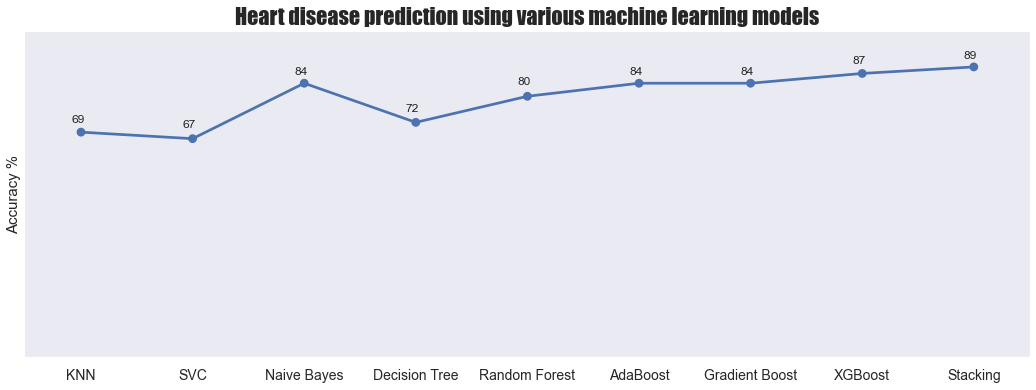

In [102]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(18,6))
sns.pointplot(data=accuracy_score_df, x='name', y='score')
for i, v in enumerate(test_set_accuracy):
    ax.annotate(str(round(v*100)), xy=(i, v), xytext=(-10,10), textcoords='offset points')
ax.set_ylim(0, 1)
ax.set_yticks([])
ax.set_ylabel('Accuracy %', fontdict={'size':15})
ax.spines['left'].set_visible(False)
ax.set_xticklabels(labels, fontdict={'size':14})
ax.set_xlabel('')
ax.set_title('Heart disease prediction using various machine learning models', fontdict={'family':'fantasy','size':22})
plt.show()